<a href="https://colab.research.google.com/github/omkarjadhav296/SAR/blob/main/Refined_Lee_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance

def lee_filter(img, size):
    img_mean = uniform_filter(img, (size, size))
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2

    overall_variance = variance(img)

    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output

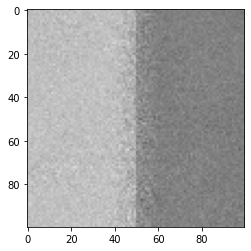

In [2]:
from pylab import *
import numpy as np
img = np.random.normal(0.5, 0.1, (100,100))
img[:,:50] += 0.25
imshow(img, vmin=0, vmax=1, cmap='gray')
imshow(lee_filter(img, 20), vmin=0, vmax=1, cmap='gray')

In [3]:
pip install findpeaks

     |████████████████████████████████| 45 kB 1.8 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=0dfd63a4cfb85a15d474cb18e158d3eb0f126cb1acbcddc80c974d341aa894f4
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import cv2
import matplotlib.pyplot as plt
# %matplotlib inline

from google.colab import files
uploaded = files.upload()

img = cv2.imread('lenna.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(ncols=2)

ax[0].imshow(img[..., ::-1])  # BGR to RGB
ax[0].set_title('Original image')

ax[1].imshow(gray_img, cmap=plt.cm.gray)
ax[1].set_title('Grayscale image')

plt.show()

In [ ]:
from findpeaks import findpeaks

# Read image
img = cv2.imread('noise.png')

filters = [None, 'lee','lee_enhanced','kuan', 'fastnl','bilateral','frost','median','mean']

for getfilter in filters:
    fp = findpeaks(method='topology', scale=False, denoise=getfilter, togray=True, imsize=False, window=15)
    fp.fit(img)
    fp.plot_mesh(wireframe=False, title=str(getfilter), view=(30,30))

In [ ]:
# Some pre-processing
# Make grey image
img = findpeaks.stats.togray(img)
# Scale between [0-255]
img = findpeaks.stats.scale(img)

# Denoising
# fastnl
img_fastnl = findpeaks.stats.denoise(img, method='fastnl', window=winsize)
# bilateral
img_bilateral = findpeaks.stats.denoise(img, method='bilateral', window=winsize)
# frost filter
image_frost = findpeaks.frost_filter(img, damping_factor=k_value1, win_size=winsize)
# kuan filter
image_kuan = findpeaks.kuan_filter(img, win_size=winsize, cu=cu_value)
# lee filter
image_lee = findpeaks.lee_filter(img, win_size=winsize, cu=cu_value)
# lee enhanced filter
image_lee_enhanced = findpeaks.lee_enhanced_filter(img, win_size=winsize, k=k_value2, cu=cu_lee_enhanced, cmax=cmax_value)
# mean filter
image_mean = findpeaks.mean_filter(img, win_size=winsize)
# median filter
image_median = findpeaks.median_filter(img, win_size=winsize)


plt.figure(); plt.imshow(img_fastnl, cmap='gray'); plt.title('Fastnl')
plt.figure(); plt.imshow(img_bilateral, cmap='gray'); plt.title('Bilateral')
plt.figure(); plt.imshow(image_frost, cmap='gray'); plt.title('Frost')
plt.figure(); plt.imshow(image_kuan, cmap='gray'); plt.title('Kuan')
plt.figure(); plt.imshow(image_lee, cmap='gray'); plt.title('Lee')
plt.figure(); plt.imshow(image_lee_enhanced, cmap='gray'); plt.title('Lee Enhanced')
plt.figure(); plt.imshow(image_mean, cmap='gray'); plt.title('Mean')
plt.figure(); plt.imshow(image_median, cmap='gray'); plt.title('Median')